In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


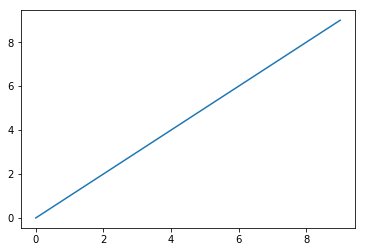

In [16]:
data = np.arange(10)
data
plt.plot(data)

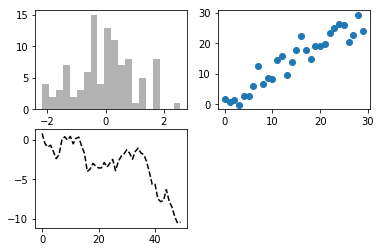

In [17]:
# figures and subplots
"""
plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure
"""
fig = plt.figure()  # figsize will set certain size
ax1 = fig.add_subplot(2, 2, 1)  # figure should be 2X2 and ax1 is the first of four subplots
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
"""
When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding
the figure and subplot creation
"""
# 'k--' is a style option instructing matplotlib to plot a black dashed line
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

(array([ 4.,  1.,  5.,  3.,  8.,  8.,  6., 10., 16.,  5.,  7.,  7.,  6.,
         6.,  3.,  1.,  2.,  1.,  0.,  1.]),
 array([-2.28810482, -2.02022475, -1.75234469, -1.48446463, -1.21658457,
        -0.9487045 , -0.68082444, -0.41294438, -0.14506432,  0.12281575,
         0.39069581,  0.65857587,  0.92645593,  1.194336  ,  1.46221606,
         1.73009612,  1.99797619,  2.26585625,  2.53373631,  2.80161637,
         3.06949644]),
 <a list of 20 Patch objects>)

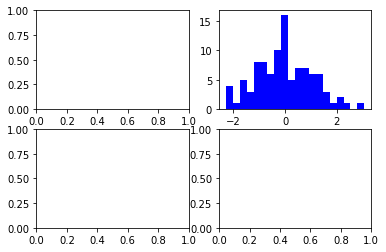

In [18]:
# plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects
fig, axes = plt.subplots(2, 2)
axes
axes[0][1].hist(np.random.randn(100), bins=20, color='blue')

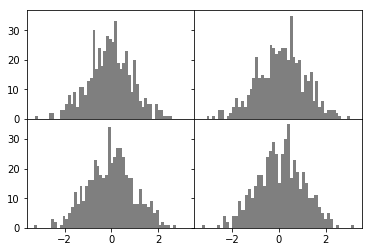

In [4]:
# adjusting the spacing around the subplots
# sharex: all subplots should use the same x-axis ticks
# sharey: all subplots should use the same y-axis ticks
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
# shrink the spacing all the way to zero
plt.subplots_adjust(wspace=0, hspace=0)

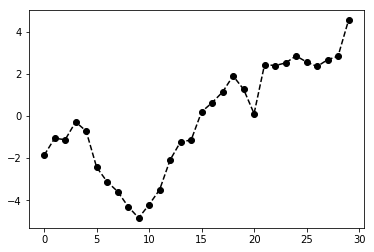

In [26]:
# colors, markers, and line styles
plt.plot(np.random.randn(30).cumsum(), 'ko--')  # k: color(black), o: marker(circle), --: linestyle(dashed)
# plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

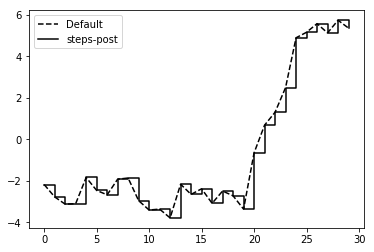

In [27]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label="Default")
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
# we are able to create a plot legend to identify each line using plt.legend

[Text(0.5,0,'Stages'), Text(0.5,1,'My first matplotlib plot')]

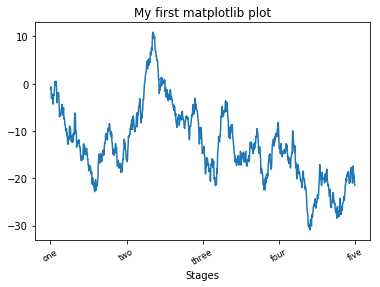

In [4]:
# ticks, labels, and legends
# setting the title, axis labels, and ticklabels
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
# to change the x-axis ticks, use set_xticks and set_xticklabels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('stages')
# The axes class has a set method that allows batch setting of plot properties. From the
# prior example, we could also have written
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages',
}
ax.set(**props)


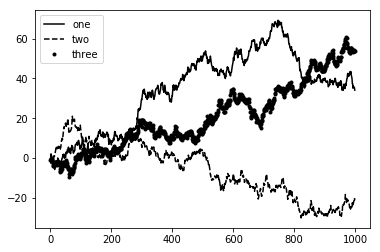

In [7]:
# adding legends
# legends are another critical element for identifying plot elements
from numpy.random import randn
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# call ax.legend() or plt.legend() to automatically create a legend
ax.legend(loc='best')   # 'best' choose a location that is most out of the way

FileNotFoundError: File b'examples/spx.csv' does not exist

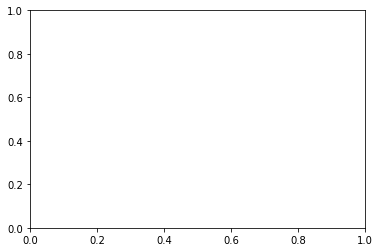

In [8]:
# annotations and drawing on a subplot
"""
You can add annotations
and text using the text, arrow, and annotate functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling:
"""
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

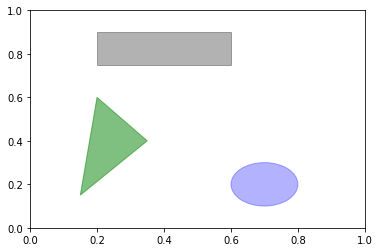

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.1, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


In [16]:
# saving plots to file
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

In [18]:
# matplotlib configuration
plt.rc('figure', figsize=(10, 10))
# The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 10}
plt.rc('font', **font_options)
